<a href="https://colab.research.google.com/github/mloyorev/Theory/blob/main/2_NeoclasicalOptimalGrowthModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We use te following **imports**:

*   **Numpy:** Python library used to perform efficient numeric operations on matrices and multidimensional arrays.
*   **Matplotlib.pyplot:** Python's Matplotlib library and is used to create graphs and data visualizations.
*   **Namedtuple:** Import the namedtuple class from the collections module. Namedtuple is a factory function that allows you to create tuples with predefined field names.
*   **Pandas:** Python library used primarily for data analysis and manipulation.







In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import pandas as pd

# **Neoclassical Optimal Growth Model**

In order to better understand the VFI algorithm, let's propose the case of the **neoclasical optimal growth model** with...

*   the following **utilitity function**:

$$u(c_t)=\frac{c_t^{1-σ}-1}{1-σ}$$

*   the following **budget constraint**:

$$k_t^α=c_t+k_{t+1}-(1-\delta)k_t$$

such that this **economy face the following problem**...

$$\max_{\left\{ c_t, k_{t+1} \right\}}∑_{t=0}^∞\frac{\beta^{t}(c_t^{1-σ}-1)}{1-σ} \hspace 0.2cm s.a. \hspace 0.2cm k_t^α=c_t+k_{t+1}-(1-\delta)k_t$$

which is a problem in a **succesive format**.




Nevertheless, the format of the problem **we seek to solve is recursive**. To go from a problem in successive format to a recursive one, we follow these steps:

1.   We **write the problem as a value function** that takes as an argument the state variable, $k_t$, and $D(k_{t+s})$ as the budget constraint.

$$V(k_t)=\max_{\left\{c_{t+s},k_{t+1+s}∈D(k_{t+s})\right\}_{s=0}^∞}∑_{s=0}^∞\frac{\beta^{s}(c_{t+s}^{1-σ}-1)}{1-σ}$$

2.   We can reduce the number of control varibles by expressing **consumption in terms of the budget constraint** as $c_t=k_t^α-k_{t+1}+(1-δ)k_t$.

$$V(k_t)=\max_{\left\{k_{t+1+s}∈D(k_{t+s})\right\}_{s=0}^∞}∑_{s=0}^∞\frac{\beta^{s}((k_{t+s}^α-k_{t+1+s}+(1-δ)k_{t+s})^{1-σ}-1)}{1-σ}$$

3.  The value function can be rewritten as

$$V(k_t)=\max_{\left\{k_{t+1}∈D(k_{t})\right\}}\frac{(k_{t}^α-k_{t+1}+(1-δ)k_{t})^{1-σ}-1}{1-σ}+\max_{\left\{k_{t+1+s}∈D(k_{t+s})\right\}_{s=1}^∞}∑_{s=1}^∞\frac{\beta^{s}((k_{t+s}^α-k_{t+1+s}+(1-δ)k_{t+s})^{1-σ}-1)}{1-σ}$$

4. Then we make the **substitution** $s=k+1$, such that

$$V(k_t)=\max_{\left\{k_{t+1}∈D(k_{t})\right\}}\frac{(k_{t}^α-k_{t+1}+(1-δ)k_{t})^{1-σ}-1}{1-σ}+\max_{\left\{k_{t+2+k}∈D(k_{t+1+k})\right\}_{k=0}^∞}∑_{k=0}^∞\frac{\beta^{k+1}((k_{t+s}^α-k_{t+1+s}+(1-δ)k_{t+s})^{1-σ}-1)}{1-σ}$$

$$V(k_t)=\max_{\left\{k_{t+1}∈D(k_{t})\right\}}\frac{(k_{t}^α-k_{t+1}+(1-δ)k_{t})^{1-σ}-1}{1-σ}+\beta \max_{\left\{k_{t+2+k}∈D(k_{t+1+k})\right\}_{k=0}^∞}∑_{k=0}^∞\frac{\beta^{k}((k_{t+s}^α-k_{t+1+s}+(1-δ)k_{t+s})^{1-σ}-1)}{1-σ}$$

5.  By definition, the term that multiplies $β$ is $V(k_{t+1})$, such that

$$V(k_t)=\max_{\left\{k_{t+1}∈D(k_{t})\right\}}\frac{(k_{t}^α-k_{t+1}+(1-δ)k_{t})^{1-σ}-1}{1-σ}+\beta V(k_{t+1})$$

We can simplify the expression on the last step with the substitution $k_t=k$ and $k_{t+1}=k'$, such that we get the **Bellman equation**...

$$V(k)=\max_{\left\{k'∈D(k)\right\}}\frac{(k^α-k'+(1-δ)k)^{1-σ}-1}{1-σ}+\beta V(k')$$

and the **Bellman operator**...

$$T(V(k))=\max_{\left\{k'∈D(k)\right\}}\frac{(k^α-k'+(1-δ)k)^{1-σ}-1}{1-σ}+\beta V(k')$$





We beging by **naming the model and algorithm parameters**...



In [3]:
p_model     = namedtuple('p_model',('alpha', 'beta', 'delta', 'sigma')) # alpha is the elasticity of technology w.r.t. stock of capital
                                                                        # beta is the discount factor
                                                                        # delta is the depreciation rate

p_algorithm = namedtuple('p_algorithm', ('nbk','crit','epsi','dev'))    # nbk is the number of elements in the grid
                                                                        # crit is the convergence criterion
                                                                        # epsi is the convergence parameter
                                                                        # dev is the maximal deviation from SS

Then we set some default values for both type parameters

In [4]:
# Set default values for model and algorithm parameters
def c_p_model(alpha = 0.3, beta = 0.95, delta = 0.1, sigma = 1.5):
  return p_model(alpha = alpha, beta = beta, delta = delta, sigma = sigma)

def c_p_algorithm(nbk = 1000, crit = 1, epsi = 1e-6, dev = 0.9):
  return p_algorithm(nbk = nbk, crit = crit, epsi = epsi, dev = dev)

In [5]:
# Name variables that contain the parameter values
model     = c_p_model()
algorithm = c_p_algorithm()

By solving analytically the successive format of the problem of this economy, we obtain that the **steady state capital stock**$^{1}$ is...

$$k_{ss}=\left(\frac{1-\beta(1-δ)}{αβ}\right)^{\frac{1}{α-1}}$$



In [7]:
# Create a function that returns the capital stock of SS
def capital_ss(params):
  alpha, beta, delta, sigma = params
  return round(((1 - beta * (1 - delta))/(alpha * beta)) ** (1/(alpha - 1)),4)

In [8]:
#For example, we can print the steady state capital stock for the the default model parameters.
kss = capital_ss(model)
print(kss)

2.6257


Now the objetive is to **find a solution** for the value function $V$, such that $T(V)=V$.

To show that the solution we are looking for exists and is also unique, we must prove that the operator satisfies the **Blackwell's sufficiency conditions**.

### **1. Monotonicity**
Let $V, W$ be value functions such that $V(k)≤W(k), ∀k∈K$. If we denote $k'$ the capital stock for the following period, we have that $V(k')≤W(k')$. By multiplying both sides of the inequality by $β$, we get...

$$\beta V(k')≤\beta W(k')$$

By adding both sides the maximization of the current utility according to $k'$, we have that...

$$\max_{\left\{k'∈D(k)\right\}}\frac{(k^α-k'+(1-δ)k)^{1-σ}-1}{1-σ}+\beta V(k')≤\max_{\left\{k'∈D(k)\right\}}\frac{(k^α-k'+(1-δ)k)^{1-σ}-1}{1-σ}+\beta W(k'), ∀k∈K$$

Which means that $T(V(k))≤T(W(k)), ∀k∈K$. Therefore, $T$ **satisfies monotonicity**.

### **2. Discounting**
Consider the value function $V$, the positive constant $a$ and the operator...

$$T(V(k)+a))=\max_{\left\{k'∈D(k)\right\}}\frac{(k^α-k'+(1-δ)k)^{1-σ}-1}{1-σ}+\beta( V(k')+a)$$

By distributive property we have that...

$$T(V(k)+a))=\max_{\left\{k'∈D(k)\right\}}\frac{(k^α-k'+(1-δ)k)^{1-σ}-1}{1-σ}+\beta V(k')+βa$$

Which means that
$T(V(k)+a)=T(V(k))+\beta a$ or that $T(V(k)+a)≤T(V(k))+\beta a$. Therefore, $T$ **satisfies discounting**.

Since the Bellman equation satisfies monotonicity and discounting, **then there exist a unique solution for the value function**.

The contraction mapping theorem give us a straightforward way to compute the solution to the bellman equation: value function iteration (VFI).

The **VFI algorithm** is:

1.   Choose a **tolerance level** $ϵ>0$.
2.   The **space where it is feasible that the state variable can be found** is discretized and packed in a grid.

$$𝒦=\left\{𝓀_{1},𝓀_{2},...,𝓀_{\text{nbk}}\right\}$$

3.   We start with an **initial inference of the value function** $V_0$, which will be a vector of the same length of the capital stock grid and that can be expressed as $\left\{V_0(k_i)\right\}_{k_i∈𝒦}$.
4.  By fixing the current capital stock $𝓀_{i}$, **we evaluate the value of the Bellman equation for each feasible capital stock** for the next period $k_j'$

$$V_{i,j}=\frac{(𝓀_{i}^α-𝓀_j'+(1-δ)𝓀_i)^{1-σ}-1}{1-σ}+\beta V_0(𝓀_j'), ∀ 𝓀_j'∈𝒦$$

5.  The step 4 will give us as a result a vector $\left\{V_{i,j}\right\}_{j=1}^{\text{nbk}}$, vector in which we have to find the maximum value.
6.  The maximum value of $\left\{V_{i,j}\right\}_{j=1}^{\text{nbk}}$ is placed on $i$ position of the updated value function $V_1$
7.  Once we have filled all the positions in $V_1$, we evaluate the **supremum norm** between $V_0$ and $V_1$...

$$d = \max_{\left\{i\in\mathbb{N}\right\}}\left\|V_0(k_i)-V_1(k_i)\right\|$$.
8.  If $d\leqϵ$ go to the next step, else go back to 4.
9.  Compute final solutions.



Then the **formula for the capital stock grid** will be...

In [9]:
# Create a function that returns a grid with all the feasible values of capital stock
# ¡We assume that the stock of feasible capital is within deviations given by dev with respect to the SS capital stock!
def capital_grid(algorithm_params, kss):
  nbk, crit, epsi, dev = algorithm_params
  kmin                 = (1 - dev) * kss
  kmax                 = (1 + dev) * kss
  return np.linspace(kmin, kmax, nbk)

In [10]:
# Given the default parameters, the capital stock grid is given by:
kgrid = capital_grid(algorithm, kss)
print(kgrid)

[0.26257    0.26730099 0.27203198 0.27676297 0.28149396 0.28622495
 0.29095595 0.29568694 0.30041793 0.30514892 0.30987991 0.3146109
 0.31934189 0.32407288 0.32880387 0.33353486 0.33826586 0.34299685
 0.34772784 0.35245883 0.35718982 0.36192081 0.3666518  0.37138279
 0.37611378 0.38084477 0.38557577 0.39030676 0.39503775 0.39976874
 0.40449973 0.40923072 0.41396171 0.4186927  0.42342369 0.42815468
 0.43288568 0.43761667 0.44234766 0.44707865 0.45180964 0.45654063
 0.46127162 0.46600261 0.4707336  0.47546459 0.48019559 0.48492658
 0.48965757 0.49438856 0.49911955 0.50385054 0.50858153 0.51331252
 0.51804351 0.5227745  0.5275055  0.53223649 0.53696748 0.54169847
 0.54642946 0.55116045 0.55589144 0.56062243 0.56535342 0.57008441
 0.57481541 0.5795464  0.58427739 0.58900838 0.59373937 0.59847036
 0.60320135 0.60793234 0.61266333 0.61739432 0.62212532 0.62685631
 0.6315873  0.63631829 0.64104928 0.64578027 0.65051126 0.65524225
 0.65997324 0.66470423 0.66943523 0.67416622 0.67889721 0.68362

The VFI algorithm is defined as...

In [26]:
def vfi(params_m, params_a, kgrid, kss):
    alpha, beta, delta, sigma = params_m  # Get parameters from function arguments.
    nbk, crit, epsi, dev      = params_a

    kmin = (1 - dev) * kss         # Get lower and upper bounds of the grid.
    kmax = (1 + dev) * kss
    dk   = (kmax - kmin)/(nbk - 1) # Get implied increment within the capital stock grid.

    # We have to set an initial value for 'v', 'tv' and 'dr' for the code to work and that's why we initially define them as an array of zeros.
    v  = np.zeros(nbk)  # Value function,
    tv = np.zeros(nbk)  # Bellman operator.
    dr = np.zeros(nbk)  # Decision rule.

    while crit > epsi:                                                 # While the error is greater than the convergence criterion, VFI keeps iterating.
      for i in range(nbk):
        # For a particular 'i' in kgrid, we compute the feasible level of capital stock, according to consumption constraint.
        #   1. Assuming that on the next period, the economy keeps a capital stock equal to kmin, compute the feasible levels of consumption of each level of current capital stock.
        #   2. We compute imax, which is the last index to satisfy the feasibility of consumption (check the appendix for the analytical calculation of imax) 2.
        tmp  = (kgrid[i] ** alpha + (1 - delta) * kgrid[i] - kmin)
        imax = min(int(np.floor(tmp / dk) + 1), nbk)

        # For the same particular 'i', we compute consumption and utility according to the feasible levels of capital stock.
        c    = kgrid[i] ** alpha + (1 - delta) * kgrid[i] - kgrid[0:imax]
        util = (c ** (1- sigma) - 1) / (1 - sigma)

        # Finally we solve the Bellman equiation and update the Bellman equation.
        max_index = np.argmax(util + beta * v[0:imax])
        tv[i] = util[max_index] + beta * v[max_index]
        dr[i] = max_index

     # Each time we complete this process we evaluate the supremum norm and update 'crit', to continue with the iteration.
      crit = np.max(np.abs(tv-v))
      v    = np.copy(tv)

    # We compute the final solutions for the next period capital stock (result_1), consumption (result_2), utility (result_3) and value function (result_4).
    result_1 = kgrid[dr.astype(int)]
    result_2 = kgrid ** alpha + (1 - delta) * kgrid - result_1
    result_3 = (result_2 ** (1 - sigma) - 1) / (1 - sigma)
    result_4 = v

    return result_1, result_2, result_3, result_4


Once we have already set the value function iteration funtion, **we evaluate it on the default parameters** and get that particular solution for the problem.

In [14]:
vfi = vfi(model, algorithm, kgrid, kss)

Finally, it will be useful to create **functions that generate graphs** that relate the elements of the grid with...

*   Next period capital stock (result_1).
*   Consumption (result_2).
*   Value function (result_4).







In [15]:
def g_capital(kgrid, vfi, kss):
    result_1, result_2, result_3, result_4 = vfi

    plt.plot(kgrid, result_1, color='orange')
    plt.plot(kgrid, kgrid, color='black', linestyle='--')

    plt.xlabel('$k_t$')
    plt.ylabel('$k_{t+1}$')
    plt.title('Next period capital stock')
    plt.grid(True)

    plt.plot(kss, kss, "go", ms=10, alpha=0.6)
    plt.annotate("$k_{ss} =$" + str(round(kss, 3)),
                 xy=(kss, kss),
                 xycoords="data",
                 xytext=(20, -20),
                 textcoords="offset points",
                 fontsize=12)

    plt.ylim(np.min(result_1), np.max(result_1))

    return plt.show()

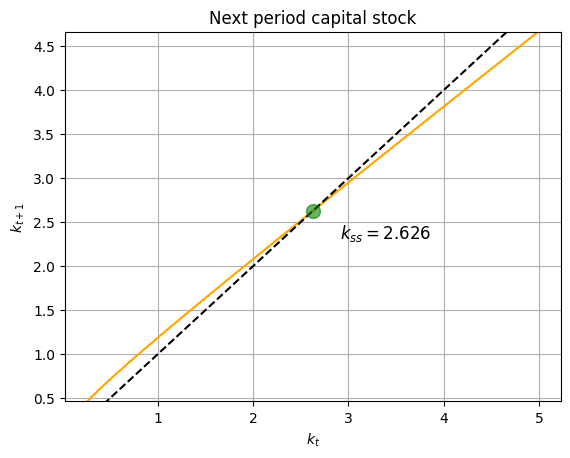

In [16]:
# As an example, we can evaluate this graph for the default parameters.
g_capital(kgrid, vfi, kss)

In [17]:
# Function to create a graph that relates each element on the kgrid with the consumption.
def g_consumption(kgrid, vfi):
  result_1, result_2, result_3, result_4 = vfi

  plt.plot(kgrid, result_2, color = 'blue')

  plt.xlabel('$k_t$')
  plt.ylabel('Consumption')
  plt.title('Consumption')
  plt.grid(True)

  return plt.show()


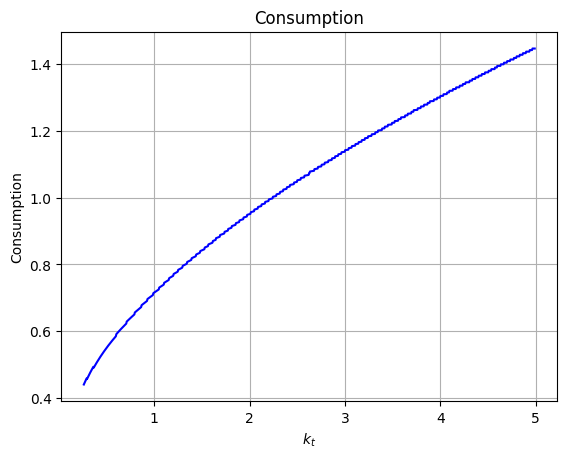

In [18]:
g_consumption(kgrid, vfi)

In [19]:
# Function to create a graph that relates each element on the kgrid with the the value function.
def g_value(kgrid, vfi):
  result_1, result_2, result_3, result_4 = vfi

  plt.plot(kgrid, result_4, color = 'green')

  plt.xlabel('$k_t$')
  plt.ylabel('Value function')
  plt.title('Value function')
  plt.grid(True)

  return plt.show()

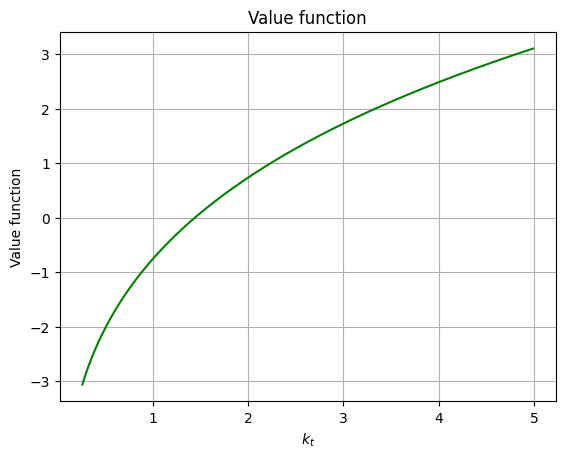

In [20]:
g_value(kgrid, vfi)

Thus, we have the following formulas defined:

*   Steady state capital stock, **capital_ss**.
*   Capital stock grid, **capital_grid**.
*   Valued function iteration procedure, **value_function_iteration**.
*   Graph for kgrid vs. next period capital stock, **g_capital**.
*   Graph for kgrid vs. consumption, **g_consumtion**.
*   Graph for kgrid vs. value function, **g_value**.

Wich means that by using those formulas we can compute solutions for any set of parameters.


















In [24]:
def solve(p_model, p_algorithm):
  # STEP 1: Calculate the steady state capital stock.
  k_ss = capital_ss(p_model)

  # STEP 2: Get a grid of admissible values for the capital stock
  k_grid = capital_grid(p_algorithm, k_ss)

  # STEP 3: Solve using VFI
  nogm_vfi = vfi(p_model, p_algorithm, k_grid, k_ss)

  #STEP 4: Get graphs
  A = g_capital(k_grid, nogm_vfi, k_ss)
  B = g_consumption(k_grid, nogm_vfi)
  C = g_value(k_grid, nogm_vfi)

  return A, B, C


Now, let's suppose a case in wich we have that $δ=1$, keeping all model parameters constant, and $dev = 0.5$, keeping all algorithm parameters constant.

In [22]:
# Name variables that contain the parameter values
model1     = c_p_model(delta = 1)
algorithm1 = c_p_algorithm(dev = 0.5)

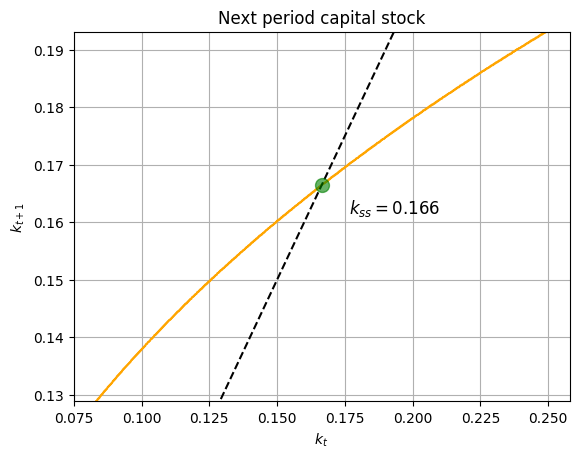

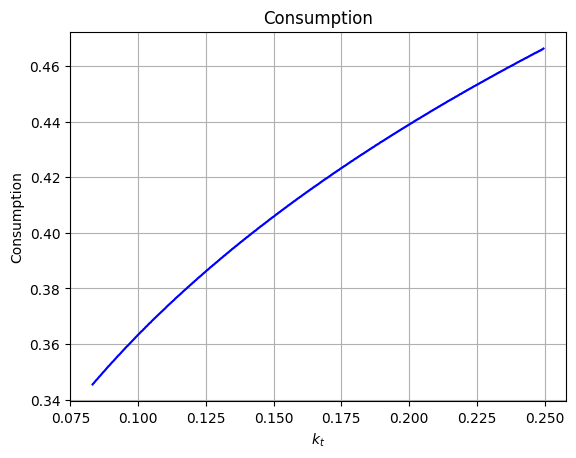

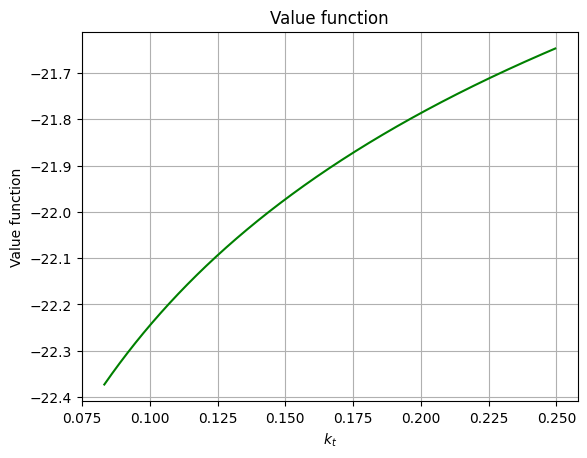

(None, None, None)

In [27]:
# ¡If the code does not run, return to the vfi funtion run it again and then run this line!
solve(model1, algorithm1)

## **Appendix**

$^{1}$ By solving the succesive problem, we obtain the following FOC for the capital stock

$$\alpha k_{t}^{\alpha-1}=\frac{λ_{t}}{λ_{t+1}}-(1-\delta)$$

When the economy is in SS, we know that $k_{t}=k_{ss}$ and $\frac{λ_{t}}{λ_{t+1}}=\frac{1}{β}$, such that

$$\alpha k_{ss}^{\alpha-1}=\frac{1}{β}-(1-\delta)$$

$$\alpha k_{ss}^{\alpha-1}=\frac{1-β(1-δ)}{β}$$

$$ k_{ss}^{\alpha-1}=\frac{1-β(1-δ)}{\alpha β}$$

$$ k_{ss}=\left(\frac{1-β(1-δ)}{\alpha β}\right)^{\frac{1}{\alpha-1}}$$

$^{2}$ In order to have a feasible level of consumption, we know that

$$0\leq c\leq k^{\alpha}+(1-\delta)k$$

$$0\leq k^{\alpha}+(1-\delta)k-k' \leq k^{\alpha}+(1-\delta)k$$

$$-k^{\alpha}\leq (1-\delta)k-k' \leq (1-\delta)k$$

$$-k^{\alpha}-(1-\delta)k\leq -k' \leq 0$$

$$0\leq k' \leq k^{\alpha}+(1-\delta)k$$

The previous derivation implies that the state variable $k^{'}$ is bounded.

Given that $∀ k_{h}$ cointained on the grid, $k_{h}=\underline{k} +(h-1)dk$ must be satisfied ($h$ is the gridpoint and $dk$ is the implied increment of the grid).

Therefore, the maximum index of the gridpoint that satisfies $0\leq c\leq k^{\alpha}+(1-\delta)k$ is given by

$$imax=\min\left\{\overline{h},nbk\right\}$$

where

$$k_{\overline{h}}=\underline{k}+(\overline{h}-1)dk$$

$$k^{\alpha}+(1-\delta)k=\underline{k}+(\overline{h}-1)dk$$

$$(\overline{h}-1)dk=k^{\alpha}+(1-\delta)k-\underline{k}$$

$$\overline{h}-1=\frac{k^{\alpha}+(1-\delta)k-\underline{k}}{dk}$$

$$\overline{h}=\left[\frac{k^{\alpha}+(1-\delta)k-\underline{k}}{dk}\right]+1$$

where $\underline{k}$ is the minimum capital stock, $\overline{h}$ is the maximum gridpoint that satisifes feasibility and $[\cdot]$ denote that we round the result to the nearest low integer.